In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [16]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [18]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [19]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [20]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [21]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


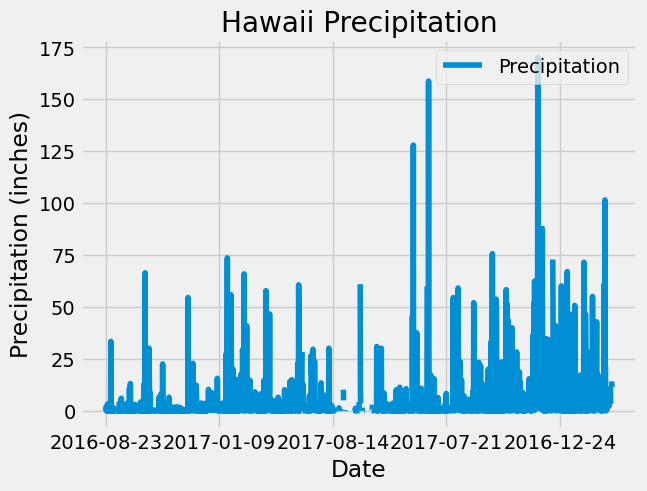

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23)- dt.timedelta(days=365)



# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['date', 'precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace = True)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'precipitation')
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Hawaii Precipitation")
plt.legend(["Precipitation"], loc='upper right')
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_temp = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281')
top_station_temp.first()  
top_station_temp = pd.DataFrame(top_station_temp)
top_station_temp.head()

temps = top_station_temp['tobs']
print(f'Highest: {(temps).max()}, Lowest: {(temps.min())}, Average: {(temps).mean()}')

Highest: 29.4, Lowest: 12.2, Average: 22.035822510822513


Text(0.5, 0, 'Temperature')

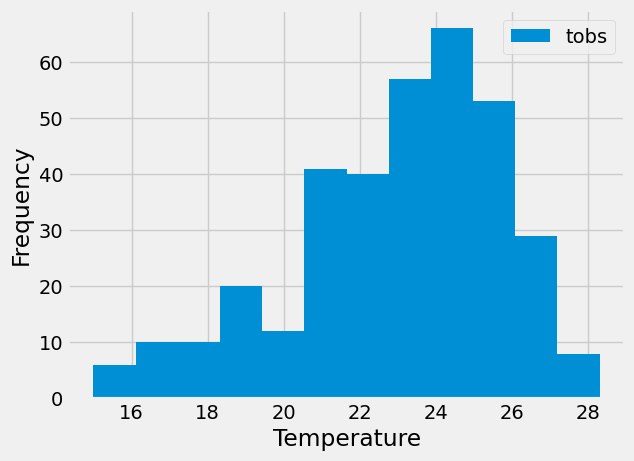

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
 # year_ago_date = 2016-08-23
# .filter(Measurement.date >= year_ago_date).all()
#.filter(Measurement.station == 'USC00519281')


temp_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= "2016-08-23").all()

temp_df= pd.DataFrame(temp_data)
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')



In [59]:
# Close Session
session.close()
